# Regressão Linear

Regressão Linear é uma subclasse dos *Algoritmos Supervisionados* usada para prever valores contínuos.

No caso mais simples, temos a Regressão Linear Simples/Univariada dada por

$$ \hat{y} = w_0 + w_1 x ,$$

sendo $ x $ nossa variável de entrada (feature).

No caso mais geral, ie, para um conjunto de $ n $ features temos a *Regressão Linear Multivariada* que é dada por

$$ \hat{y} = w_0 + w_1x_1 + \cdots + w_nx_n = w_0 + \sum_{i=1}^n w_ix_i = w_0 + w^T x. $$



# Modelo de Regressão Linear com Quadrados Mínimos

Vamos usar o *método dos quadrados mínimos* para estimar os parâmetros que minimizam a soma das distâncias verticais.

## Regressão Linear via Gradientes Descendente

Nosso objetivo aqui é obtermos os parâmetros $ w_i, \ i=1,\cdots, n $ que  minimizam a função custo $ J(.) $. No nosso caso nossa função custo será a *soma dos quadrados dos erros* dada por
$$ J(w) = \dfrac{1}{2n}\sum_{i=1}^n (y^{(i)}-\hat{y}^{(i)})^2 .$$

Para tal, vamos usar algoritmos de otimização, como o **método do Gradiente Descendente**.

(Notação: $\hat{y} $ é o valor predito $ \hat{y} = w_0 + w^T x $.)

O método do Gradiente Descendente atualiza os pesos da seguinte forma

$$ w_i = w_i - \alpha \dfrac{\partial J}{\partial w_i}, $$

onde $ \alpha $ é o *parâmetro de aprendizagem (ou learning rate)*.

Da equação acima temos então que 

$$ \dfrac{\partial J}{\partial w_i} = \dfrac{1}{n}\sum_{i=1}^n (y^{(i)}-\hat{y}^{(i)}) \dfrac{\partial \hat{y}^{(i)}}{\partial w_i} = \dfrac{1}{n}\sum_{i=1}^n (y^{(i)}-\hat{y}^{(i)}) x_i .$$

Portanto, no caso em questão nosso Gradiente Descendente será dado por

$$ w_0 = w_0 - \dfrac{\alpha}{n}\sum_{i=1}^n (y^{(i)}-\hat{y}^{(i)})$$
e
$$ w_i = w_i - \dfrac{\alpha}{n}\sum_{i=1}^n (y^{(i)}-\hat{y}^{(i)}) x_i .$$

### Algoritmo do Modelo de Regressão Linear Simples

In [ ]:
import numpy as np

In [ ]:
class LinearRegressionGD(object):
  '''
    Regressao Linear via Gradiente Descendente

    Parametros de entrada:
      alpha - Learning Rate
      n_iter - epochs (Quantidade de vezes que treinamos o algoritmo sobre conjunto de dados)
      X - vetor n-dimensional com n exemplos de treino
      y - vetor n-dimensional de respostas referentes a cada valor de exemplo de X
  '''
  def __init__(self, alpha=0.001, n_iter=20):
    self.alpha = alpha
    self.n_iter = n_iter
    

  def fit(self, X, y):
    n = X.shape[0]


    self.w0 = 0
    self.w1 = 0

    self.cost_ = []

    for i in range(self.n_iter):
      # y_hat.shape = (n, 1) 
      y_hat = self.w0 + self.w1 * X
    
      error = (y - y_hat)
      mean_sq_er = np.sum(error ** 2) / (2 * (n + 1))

      self.w0 = self.w0 + self.alpha * np.sum(error) / (n + 1)
      self.w1 = self.w1 + self.alpha * np.sum(error * X) / (n + 1)
      
      self.cost_.append(mean_sq_er)

      if i % 50 == 0:
        print('Epoch {}. Erro Quadratico: {}'.format(i, mean_sq_er))
    return self

  def predict(self, X):
    return self.w0 + self.w1 * X

## Aplicando Regressão Linear a um conjunto de dados sintéticos

In [ ]:
X = np.array([2.4,5.0,1.5,3.8,8.7,3.6,1.2,8.1,2.5,5,1.6,1.6,2.4,3.9,5.4])
y = np.array([2.1,4.7,1.7,3.6,8.7,3.2,1.0,8.0,2.4,6,1.1,1.3,2.4,3.9,4.8])

In [ ]:
X = np.reshape(X, (X.shape[0], 1))
y = np.reshape(y, (y.shape[0], 1))

In [ ]:
print(X.shape, y.shape)

(15, 1) (15, 1)


### Treinando o nosso modelo de Regressão Linear

In [ ]:
linear_model = LinearRegressionGD(n_iter=500)
linear_model.fit(X, y)

Epoch 0. Erro Quadratico: 8.8109375
Epoch 50. Erro Quadratico: 1.3869902355439079
Epoch 100. Erro Quadratico: 0.2745596210110491
Epoch 150. Erro Quadratico: 0.10755792988248909
Epoch 200. Erro Quadratico: 0.08218327660552562
Epoch 250. Erro Quadratico: 0.07803167177415868
Epoch 300. Erro Quadratico: 0.07706726302162804
Epoch 350. Erro Quadratico: 0.07658821954180084
Epoch 400. Erro Quadratico: 0.07618964200978366
Epoch 450. Erro Quadratico: 0.07581069933643762


### Visualizando a convergência do algoritmo

In [ ]:
# Visualizando os dados
import matplotlib.pyplot as plt

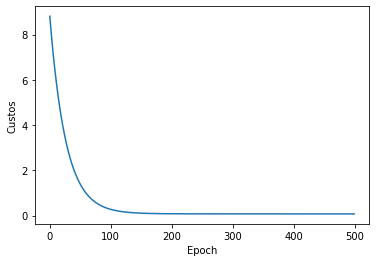

In [ ]:
plt.plot(range(linear_model.n_iter), linear_model.cost_)
plt.ylabel('Custos')
plt.xlabel('Epoch')
plt.show()

In [ ]:
def lin_regplot(X, y, model):
  plt.scatter(X, y, c='steelblue', edgecolor='white', s=70)
  plt.plot(X, model.predict(X), color='black', lw=2)
  return None

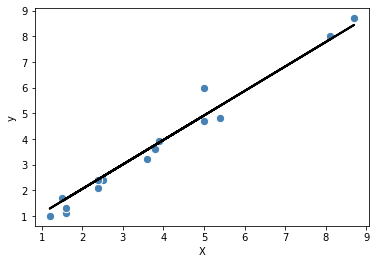

In [ ]:
lin_regplot(X, y, linear_model)
plt.xlabel('X')
plt.ylabel('y')
plt.show()

In [ ]:
print(f"Coeficientes do modelo:\nw0 = {linear_model.w0}\nw1 = {linear_model.w1}")

Coeficientes do modelo:
w0 = 0.14304182021723658
w1 = 0.9539531121959206


# Regressão Linear com scikit-learn

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
linear_regression = LinearRegression()

In [ ]:
linear_regression.fit(X, y)

LinearRegression()

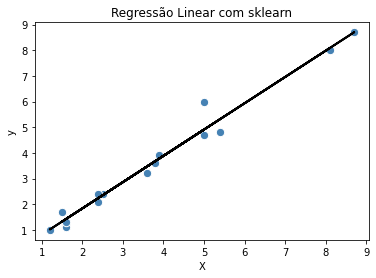

In [ ]:
lin_regplot(X, y, linear_regression)
plt.xlabel('X')
plt.ylabel('y')
plt.title('Regressão Linear com sklearn')
plt.show()

In [ ]:
print("Coeficientes do modelo:")
print("w0 estimado com LinearRegression:", linear_regression.intercept_[0])
print("w1 estimado com LinearRegression:", linear_regression.coef_.ravel()[0])

Coeficientes do modelo:
w0 estimado com LinearRegression: -0.21354150071690547
w1 estimado com LinearRegression: 1.024746428761086


## RANSAC (RANdom SAmple Consesus)

Modelos de Regressão Linear podem ser muito impactados por **outliers**. Uma alternativa para isso é "jogar fora" tais outliers. Para tal, usamos a regressão com o auxílio do algoritmo [RANSAC](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.RANSACRegressor.html) que se ajusta a um subconjunto dos dados ditos **inliers**.

O processo de iteração do algoritmo é dado abaixo:
1. Seleciona-se o número de amostras para serem nossos *inliers* e ajustamos o nosso modelo;

2. Testa-se o restante dos dados para serem adicionados ao conjuntoo de inliers e adicionamos esses novos dados de acordo com uma tolerância;

3. Reajusta-se os dados usando os novos inliers;

4. Estima-se o erro do modelo com relação aos inliers;

5. Finaliza-se o algoritmo se algum limiar ou número de iterações é atingido. Caso contrário, volta-se para o passo 1.

# Avaliando a qualidade de modelos de Regressão

In [ ]:
# Gerando alguns dados sinteticos
x = np.linspace(-1, 1, 50)
fx = 1 + 2 * x  # Funçao geratriz

np.random.seed(10)
noise = np.random.normal(scale=0.5, size=x.shape)  # Ruido dos dados
y = fx + noise  # Dados sinteticos

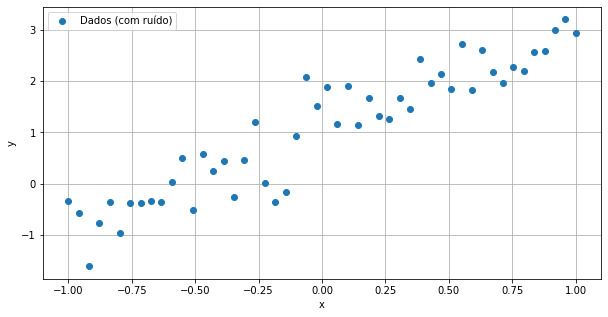

In [ ]:
# Plot dos dados
plt.figure(figsize=(10, 5))
plt.plot(x, y, 'o', label='Dados (com ruído)')
plt.legend()
plt.xlabel("x")
plt.ylabel("y")
plt.grid()
plt.show()

In [ ]:
# Transformando os dados em vetores coluna
X, Y = np.reshape(x, (x.shape[0], 1)), np.reshape(y, (y.shape[0], 1))

In [ ]:
# Importando biblioteca para divisao em treino e teste
from sklearn.model_selection import train_test_split

In [ ]:
# Divisao em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, Y,
                                                    test_size=1/3,
                                                    random_state=42)

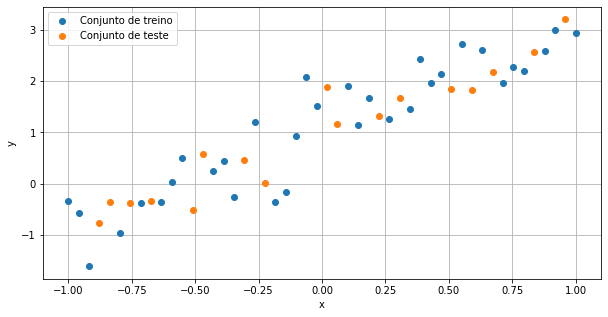

In [ ]:
# Plot dos dados de treino e teste
plt.figure(figsize=(10, 5))
plt.plot(X_train, y_train, 'o', label='Conjunto de treino')
plt.plot(X_test, y_test, 'o', label='Conjunto de teste')
plt.legend()
plt.xlabel("x")
plt.ylabel("y")
plt.grid()
plt.show()

In [ ]:
# Treinando o modelo de regressao no conjunto de treino
reg = LinearRegression()
reg.fit(X_train, y_train)

LinearRegression()

In [ ]:
# Prediçao do modelo
## Prediçao sobre o conjunto de teste
y_test_pred = reg.predict(X_test)
## Prediçao sobre o conjunto de treino
y_train_pred = reg.predict(X_train)

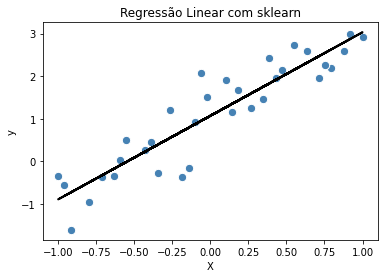

In [ ]:
lin_regplot(X_train, y_train, reg)
plt.xlabel('X')
plt.ylabel('y')
plt.title('Regressão Linear com sklearn')
plt.show()

## Mean Square Error (MSE)

O Mean Square Error, MSE, é útil para comparar diferentes modelos de regressão e também para tuning de parâmetros via método *grid search* e *cross-validation*, e é definido como:

$$ MSE = \dfrac{1}{n}\sum_{i=1}^n (y^{(i)}-\hat{y}^{(i)})^2 .$$

In [ ]:
# Implementando via sklearn
from sklearn.metrics import mean_squared_error

In [ ]:
print('MSE train: %.3f, test: %.3f' % (mean_squared_error(y_train, y_train_pred), 
                                       mean_squared_error(y_test, y_test_pred)))

MSE train: 0.248, test: 0.114


## Coeficiente de Determinação ($ R^2 $)

$ R^2 $ pode ser entendida como uma forma padronizada do MSE. Ou ainda, é a fração da variância da resposta que é capturada pelo modelo, e é definido por

$$ R^2 = 1 - \dfrac{SSE}{SST}, $$

onde temos que SSE é soma dos erros quadráticos (*Sum of Squared Errors*) e SST é a soma total dos quadrados, ou ainda, a *variância da resposta*:

$$ SST = \dfrac{1}{n}\sum_{i=1}^n (y^{(i)} - \mu_y)^2. $$

Deste modo, podemos reescrever o Coeficiente de Determinação como

$$ R^2 = 1 - \dfrac{(1/n)\sum_{i=1}^n(y^{(i)}-\hat{y}^{(i)})^2}{(1/n)\sum_{i=1}^n (y^{(i)} - \mu_y)^2} = 1 - \dfrac{MSE}{Var(y)} .$$

Para o conjunto de treino $ R^2 $ é limitado entre $0$ e $1$, porém para o conjunto de teste pode ser negativa.

Se $ R^2=1 $ então o modelo se ajusta perfeitamente aos dados, de onde $ MSE = 0 $.

In [ ]:
from sklearn.metrics import r2_score

In [ ]:
print('R^2 train: %.3f, test: %.3f' %(r2_score(y_train, y_train_pred),
                                      r2_score(y_test, y_test_pred)))

R^2 train: 0.843, test: 0.919


# Referências

* https://www.analyticsvidhya.com/blog/2021/06/linear-regression-in-machine-learning/

* https://towardsdatascience.com/introduction-to-machine-learning-algorithms-linear-regression-14c4e325882a

* https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html

* Python Machine Learning - Sebastian Raschka

